# Assessment 1 Syntax Code Python Exploratory Data Analysis
Pada assessment ini, kita akan membuat visualisasi data dari [Dataset Global Temperature](https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/GlobalTemperatures.csv). Adapun jenis visualisasi yang dibuat adalah:
- Barplot (horizontal dan vertikal)
- Distplot
- Boxplot
- Scatterplot
- Pie chart

## Import Modules

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/master/datasets/GlobalTemperatures.csv"
dataset = pd.read_csv(url)

### Menampilkan 5 data teratas dari dataset

In [ ]:
dataset.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


### Menampilkan informasi umum dari dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


## Pembagian variabel yang ada pada dataset
Variabel-variabel yang ada pada dataset tersebut dapat dibagi terlebih dahulu menjadi:
1. Variabel Numerical
2. Variabel Categorical

In [ ]:
var_numerical = dataset.select_dtypes(include=['float64'])
print(var_numerical)

      LandAverageTemperature  LandAverageTemperatureUncertainty  \
0                      3.034                              3.574   
1                      3.083                              3.702   
2                      5.626                              3.076   
3                      8.490                              2.451   
4                     11.573                              2.072   
...                      ...                                ...   
3187                  14.755                              0.072   
3188                  12.999                              0.079   
3189                  10.801                              0.102   
3190                   7.433                              0.119   
3191                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN             

In [ ]:
var_categorical = dataset.select_dtypes(include=['object'])
print(var_categorical)

              dt
0     1750-01-01
1     1750-02-01
2     1750-03-01
3     1750-04-01
4     1750-05-01
...          ...
3187  2015-08-01
3188  2015-09-01
3189  2015-10-01
3190  2015-11-01
3191  2015-12-01

[3192 rows x 1 columns]


## Data Visualisations

### Barplot

#### Penetuan Target dan Fitur Variabel yang digunakan
Tujuan dari visualisasi data barplot pada studi kali ini adalah untuk menunjukkan dan membantu dalam mengenali bagaimana perubahan suhu daratan untuk setiap dekade. Untuk itu, yang menjadi target variabel pada assessment ini adalah **LandAverageTemperature** dan yang menjadi fitur variabel adalah **dekade** dari dataset['dt']

##### Target Variabel

In [ ]:
var_target = dataset['LandAverageTemperature']

##### Fitur Variabel

In [ ]:
# Mengonversi format kolom 'dt' menjadi datetime
dataset['dt'] = pd.to_datetime(dataset['dt'])

# Mengekstrak tahun dari kolom 'dt'
year = dataset['dt'].dt.year

# Mengelompokkan tahun ke dalam dekade
# Operator // akan menghasilkan hasil pembagian yang bulat.
# Misalnya: year = 1751
#          dekade = 1751 // 10 * 10
#          dekade = 175 * 10
#          dekade = 1750
dekade = year // 10 * 10

##### Dataframe Dekade dan Land Average Temperature

In [ ]:
# Mengelompokkan data var_target atau data Land Average Temperature ke dalam interval dekade
# data_dekade akan menampung nilai rata-rata data Land Average Temperature per dekade.
data_dekade = var_target.groupby(dekade).mean()

# Membuat dataframe yang berisi data Land Average Temperature dalam interval dekade
df_dekade = pd.DataFrame({'Dekade': data_dekade.index,
                        'Land Average Temperature (°C)': data_dekade.values})
df_dekade.head()

,Dekade,Land Average Temperature (°C)
0,1750,8.149852
1,1760,7.981625
2,1770,8.400108
3,1780,8.141392
4,1790,8.336867


#### Barplot Vertikal

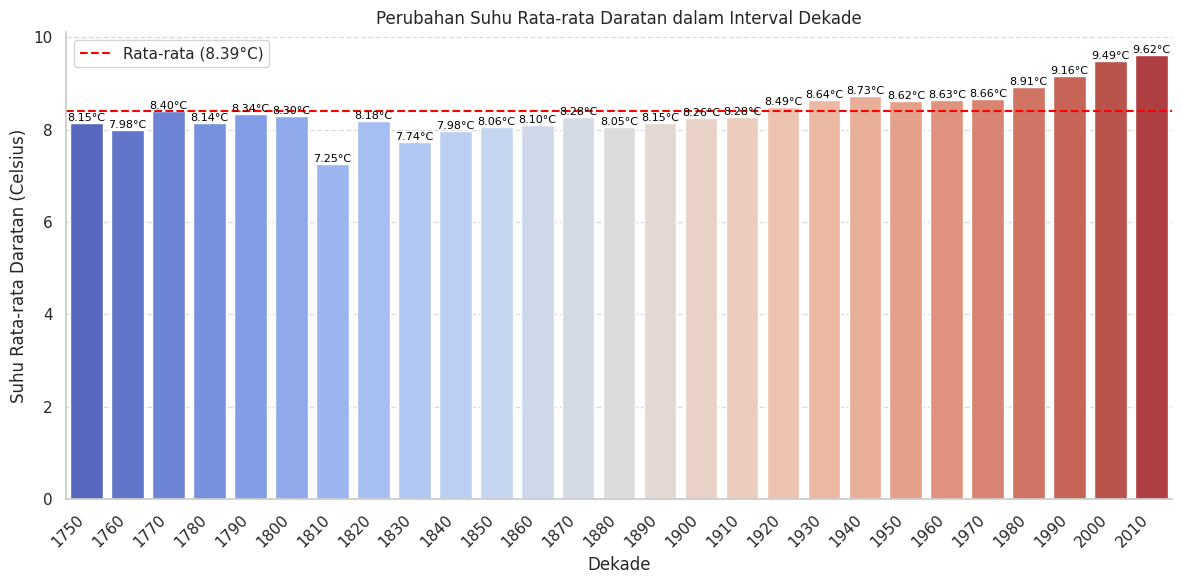

In [ ]:
# Membuat bar plot dengan Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
colors = sns.color_palette('coolwarm', len(df_dekade))
ax = sns.barplot(x='Dekade', y='Land Average Temperature (°C)', data=df_dekade, palette=colors)

plt.xlabel('Dekade')
plt.ylabel('Suhu Rata-rata Daratan (Celsius)')
plt.title('Perubahan Suhu Rata-rata Daratan dalam Interval Dekade')

# Menghilangkan spines (garis tepi) dan grid
sns.despine()

# Menambahkan grid horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan garis rata-rata dengan label
avg_temp = data_dekade.mean()
plt.axhline(y=avg_temp, color='red', linestyle='--', label=f'Rata-rata ({avg_temp:.2f}°C)')
plt.legend()

# Menyisipkan nilai suhu di atas batang
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}°C', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

# Mengatur layout agar label X-axis bisa terlihat dengan baik
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Dari hasil barplot vertikal di atas diperoleh informasi bahwa:
- Tren Peningkatan Suhu: Dari visualisasi grafik, terlihat bahwa suhu rata-rata daratan cenderung meningkat dari dekade 1750 hingga 2010.

- Dekade Terpanas pada 2010: Dekade 2010 adalah dekade dengan suhu rata-rata daratan tertinggi dibandingkan dengan dekade-dekade lainnya. Suhu rata-rata daratan pada dekade ini mencapai 9.6°C, yang merupakan nilai tertinggi dalam data yang diamati.

- Perubahan Suhu dalam Dekade: Grafik ini juga mencerminkan fluktuasi suhu rata-rata daratan dari satu dekade ke dekade berikutnya. Terdapat variasi suhu yang signifikan selama periode tersebut, tetapi tren panas yang kuat terlihat dari pertengahan abad ke-20 hingga dekade 2010.

- Referensi Rata-rata: Garis merah yang ditampilkan sebagai referensi menunjukkan rata-rata suhu daratan selama periode yang diamati. Pada beberapa dekade, suhu rata-rata daratan melebihi rata-rata tersebut, menunjukkan fluktuasi dan perubahan yang signifikan. Adapun nilai rata-rata dari rata-rata daratan per dekadenya adalah 8.39°C.

#### Barplot Horizontal

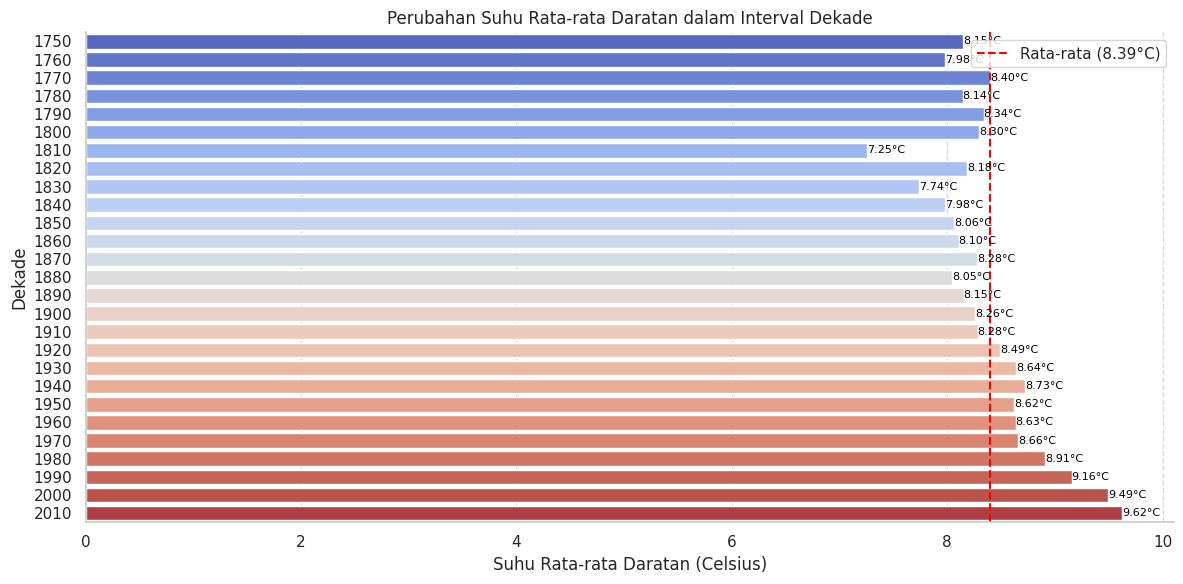

In [ ]:
# Membuat bar plot dengan Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
colors = sns.color_palette('coolwarm', len(df_dekade))
ax = sns.barplot(x='Land Average Temperature (°C)', y='Dekade', data=df_dekade, palette=colors, orient='horizontal')

plt.xlabel('Suhu Rata-rata Daratan (Celsius)')
plt.ylabel('Dekade')
plt.title('Perubahan Suhu Rata-rata Daratan dalam Interval Dekade')

# Menghilangkan spines (garis tepi) dan grid
sns.despine()

# Menambahkan grid vertikal
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menambahkan garis rata-rata dengan label
avg_temp = data_dekade.mean()
plt.axvline(x=avg_temp, color='red', linestyle='--', label=f'Rata-rata ({avg_temp:.2f}°C)')
plt.legend()

# Menyisipkan nilai suhu di sebelah kanan batang
for bar in ax.patches:
    width = bar.get_width()
    ax.annotate(f'{width:.2f}°C', (width, bar.get_y() + bar.get_height() / 2),
                va='center', fontsize=8, color='black')

# Mengatur layout agar label Y-axis bisa terlihat dengan baik
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Dari hasil barplot horizontal di atas diperoleh informasi bahwa:
- Tren Peningkatan Suhu: Dari visualisasi grafik, terlihat bahwa suhu rata-rata daratan cenderung meningkat dari dekade 1750 hingga 2010.

- Dekade Terpanas pada 2010: Dekade 2010 adalah dekade dengan suhu rata-rata daratan tertinggi dibandingkan dengan dekade-dekade lainnya. Suhu rata-rata daratan pada dekade ini mencapai 9.6°C, yang merupakan nilai tertinggi dalam data yang diamati.

- Perubahan Suhu dalam Dekade: Grafik ini juga mencerminkan fluktuasi suhu rata-rata daratan dari satu dekade ke dekade berikutnya. Terdapat variasi suhu yang signifikan selama periode tersebut, tetapi tren panas yang kuat terlihat dari pertengahan abad ke-20 hingga dekade 2010.

- Referensi Rata-rata: Garis merah yang ditampilkan sebagai referensi menunjukkan rata-rata suhu daratan selama periode yang diamati. Pada beberapa dekade, suhu rata-rata daratan melebihi rata-rata tersebut, menunjukkan fluktuasi dan perubahan yang signifikan. Adapun nilai rata-rata dari rata-rata daratan per dekadenya adalah 8.39°C.

### Distplot (Distribution Plot)
**Note**:
Distplot biasanya mencakup histogram dan KDE.
- Histogram menunjukkan sebaran data dalam bentuk batang-batang.
- KDE (Kernel Density Estimation) -> *Allows us to estimate probability density function from our finite dataset*.
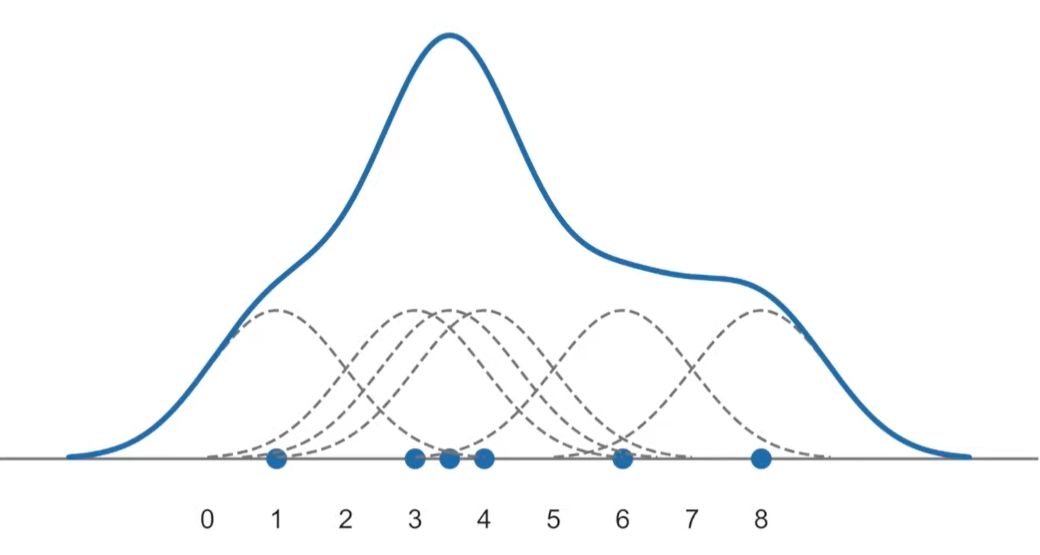

Untuk assessment kali ini, displot yang dibuat bertujuan untuk menampilkan distribusi dari data Land Average Temperature.

<ipython-input-12-34ce5f52e259>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, color=palette[4], bins=30, hist_kws={'edgecolor': 'black'})


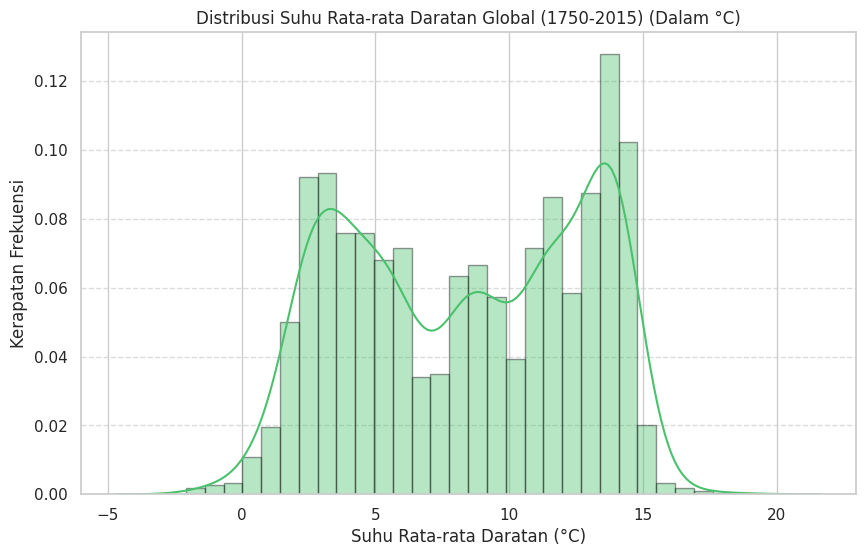

In [ ]:
# Import module
from scipy.stats import norm

# Memilih kolom 'LandAverageTemperature' dan menghapus nilai NaN
data = dataset['LandAverageTemperature'].dropna()

# Pengaturan tampilan
sns.set(style="whitegrid")
palette = sns.color_palette('viridis')
plt.figure(figsize=(10, 6))
sns.distplot(data, kde=True, color=palette[4], bins=30, hist_kws={'edgecolor': 'black'})
plt.xlabel('Suhu Rata-rata Daratan (°C)')
plt.ylabel('Kerapatan Frekuensi')
plt.title('Distribusi Suhu Rata-rata Daratan Global (1750-2015) (Dalam °C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

Dari distplot yang dihasilkan, terlihat bahwa suhu rata-rata daratan cenderung berkumpul dalam rentang nilai 0-5°C dan 10-15°C. Kedua rentang ini memiliki kerapatan frekuensi yang tinggi dibandingkan dengan rentang suhu lainnya. Ini menunjukkan bahwa rentang suhu 0-5°C dan 10-15°C merupakan rentang yang lebih umum atau dominan dalam dataset, sementara rentang suhu lainnya memiliki kerapatan yang lebih rendah.

### Boxplot

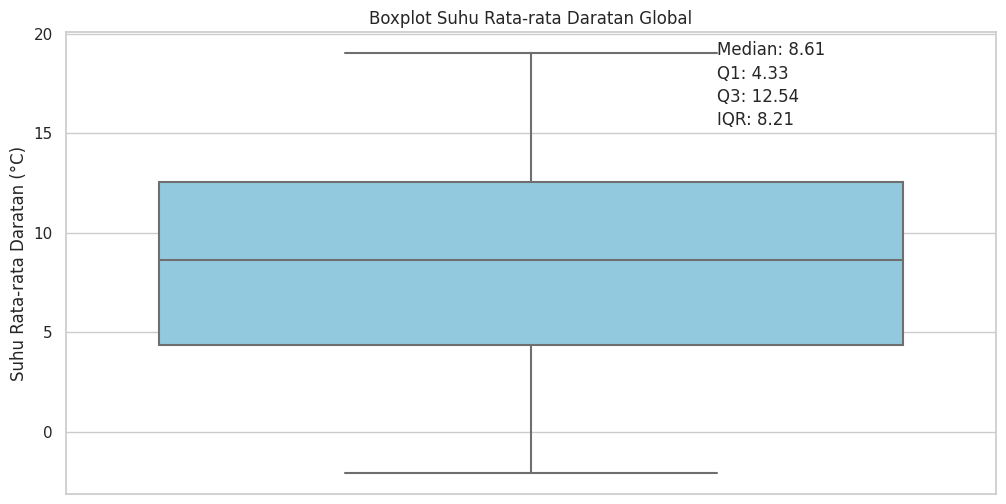

In [ ]:
# Mengatasi nilai-nilai NaN dengan nilai median
dataset['LandAverageTemperature'].fillna(dataset['LandAverageTemperature'].median(), inplace=True)

# Mengatur ukuran plot
plt.figure(figsize=(12, 6))

# Mengatur tampilan boxplot
sns.set(style="whitegrid")
sns.boxplot(y='LandAverageTemperature', data=dataset, color='skyblue')
plt.ylabel('Suhu Rata-rata Daratan (°C)')
plt.title('Boxplot Suhu Rata-rata Daratan Global')

# Menghitung statistik
Q1 = np.percentile(dataset['LandAverageTemperature'], 25)
Q3 = np.percentile(dataset['LandAverageTemperature'], 75)
IQR = Q3 - Q1
median = np.median(dataset['LandAverageTemperature'])

# Menambahkan label untuk statistik
plt.text(0.7, 0.95, f'Median: {median:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.9, f'Q1: {Q1:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.85, f'Q3: {Q3:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.7, 0.8, f'IQR: {IQR:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Menampilkan plot
plt.show()

Dari boxplot yang dihasilkan, dengan nilai median (8.61), Q1 (4.33), Q3 (12.54), dan IQR (8.21) menunjukkan bahwa data suhu rata-rata daratan global memiliki sebaran yang relatif normal. Hal ini terlihat dari simetrisnya boxplot dengan nilai median yang berada di tengah kotak dan panjangnya yang sekitar sama dari whisker atas dan bawah. Selain itu, tidak ditemukan outlier terlihat dari tidak adanya titik data yang terletak di luar whisker atas atau whisker bawah.

### Scatter Plot
Untuk assessment kali ini, scatter plot yang dibuat bertujuan untuk untuk:
- Menunjukkan korelasi antara suhu rata-rata daratan (Land Average Temperature) dan suhu rata-rata daratan dan laut (Land and Ocean Average Temperature) dalam dataset.
- Membantu kita memahami apakah terdapat pola atau tren tertentu dalam hubungan kedua variabel ini, seperti apakah suhu daratan dan laut cenderung meningkat bersamaan atau tidak.

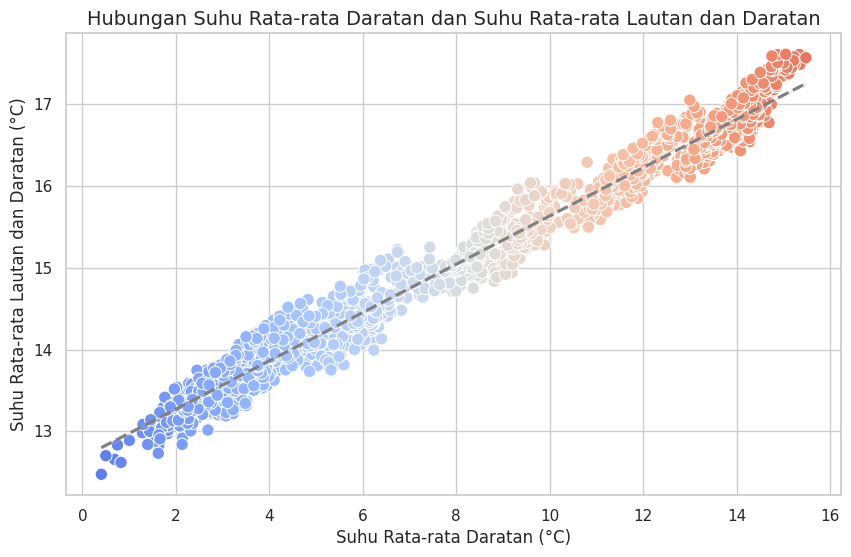

In [ ]:
# Memilih kolom 'LandAverageTemperature' dan 'LandAndOceanAverageTemperature'
suhu_daratan = dataset['LandAverageTemperature']
suhu_daratan_laut = dataset['LandAndOceanAverageTemperature']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=suhu_daratan, y=suhu_daratan_laut, hue=suhu_daratan, palette='coolwarm', edgecolor='w', s=80, legend=False)
sns.regplot(x=suhu_daratan, y=suhu_daratan_laut, scatter=False, color='gray', line_kws={'linestyle':'--'})
scatter.set(xlabel='Suhu Rata-rata Daratan (°C)', ylabel='Suhu Rata-rata Lautan dan Daratan (°C)')
plt.title('Hubungan Suhu Rata-rata Daratan dan Suhu Rata-rata Lautan dan Daratan', fontsize=14)
plt.grid(True)

# Menampilkan plot
plt.show()

Dari scatter plot yang dihasilkan, terlihat adanya korelasi positif antara suhu rata-rata daratan dan suhu rata-rata lautan dan daratan. Artinya, ketika suhu rata-rata daratan naik, cenderung juga terjadi peningkatan suhu rata-rata lautan dan daratan, dan sebaliknya.

### Pie Chart
Pie Chart di bawah ini bertujuan untuk memberikan representasi visual dari sebaran data **LandAverageTemperature** berdasarkan kategori tertentu. Dalam studi kasus ini, data suhu global dibagi menjadi empat kategori berdasarkan rentang suhu, yaitu:
- <10°C
- 10-20°C
- 20-30°C
- \>30°C

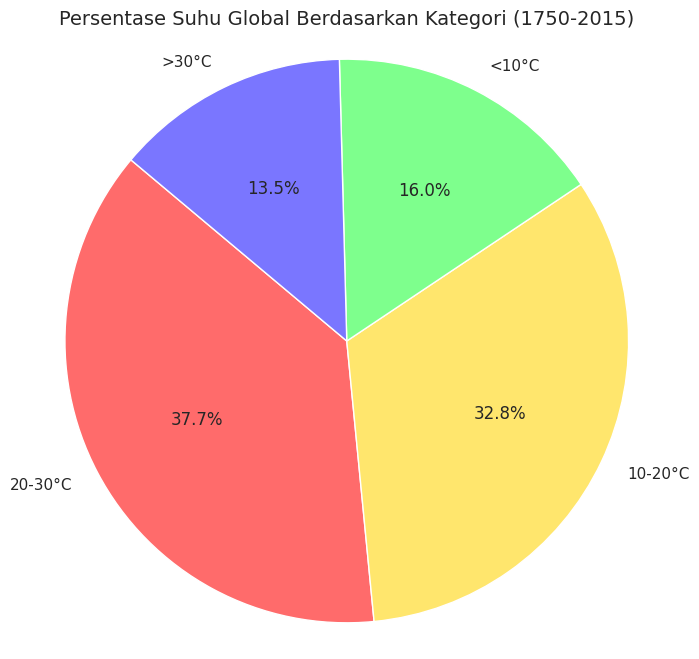

In [ ]:
# Menghitung jumlah data dalam setiap interval suhu
category_counts = pd.cut(dataset['LandAverageTemperature'], bins=4, labels=['<10°C', '10-20°C', '20-30°C', '>30°C']).value_counts()

# Membuat pie chart
colors = ['#FF6B6B', '#FFE66D', '#7EFF8D', '#7A76FF']
explode = (0, 0, 0, 0)  # Tidak ada efek explode
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Persentase Suhu Global Berdasarkan Kategori', fontsize=14)

# Menambahkan informasi tahun pada judul
tahun_mulai = year.min()
tahun_akhir = year.max()
plt.title(f'Persentase Suhu Global Berdasarkan Kategori ({tahun_mulai}-{tahun_akhir})', fontsize=14)

plt.axis('equal')

# Menampilkan pie chart
plt.show()

Dalam pie chart yang dihasilkan, kita dapat melihat bahwa kategori suhu 20-30°C mendominasi persentase suhu global dari tahun 1750 hingga 2015, dengan nilai persentasenya yaitu 37.4%. Sementara itu, kategori 10-20°C juga memiliki persentase yang signifikan sebesar 33.0%. Ini menunjukkan bahwa rentang suhu 20-30°C adalah yang paling umum dalam data, sementara rentang 10-20°C juga memiliki kontribusi yang signifikan dalam mempengaruhi suhu global dalam dataset tersebut.